# Exploration_1
## 1.1 프로젝트 설정
### 1.11 라이브러리 및 모듈 임포트

In [1]:
import tensorflow as tf, tensorflow_datasets as tfds, keras
import matplotlib.pyplot as plt
import models_base, utils

print(tf.__version__)
print(tfds.__version__)


2025-01-24 16:14:28.147962: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 16:14:28.170148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737702868.188040   54485 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737702868.193798   54485 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 16:14:28.218931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0
4.9.7


### 1.12 데이터셋 다운로드 및 확인

I0000 00:00:1737702872.175584   54485 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/technocracy90/keras/exp_1/data/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


2025-01-24 16:14:32.633663: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-24 16:14:32.930931: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-24 16:14:32.938030: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


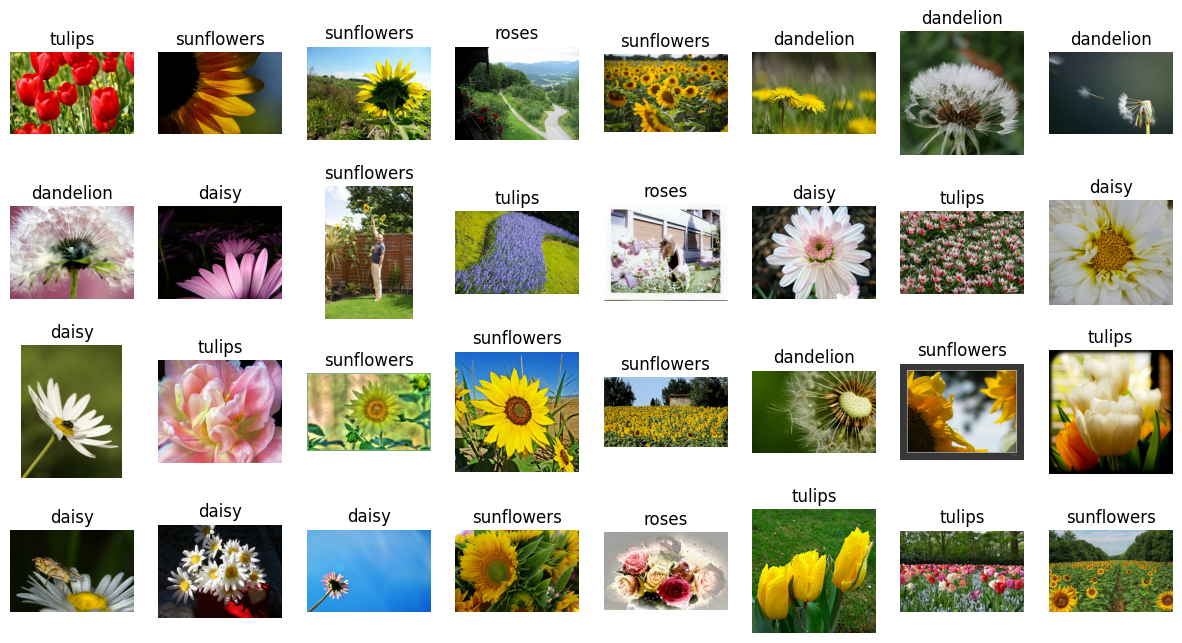

In [2]:
# Load the dataset
(raw_train, raw_validation, raw_test), dataset_info = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='~/keras/exp_1/data/',
    download=True,
    with_info=True,
    as_supervised=True,
    # batch_size = 64
)

# Print the dataset info
print(dataset_info)

utils.example_display(dataset_info, raw_train, num_examples=32, is_raw = True)

### 1.13 데이터셋 전처리 및 적재재

2025-01-24 16:14:36.800108: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-24 16:14:36.807520: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


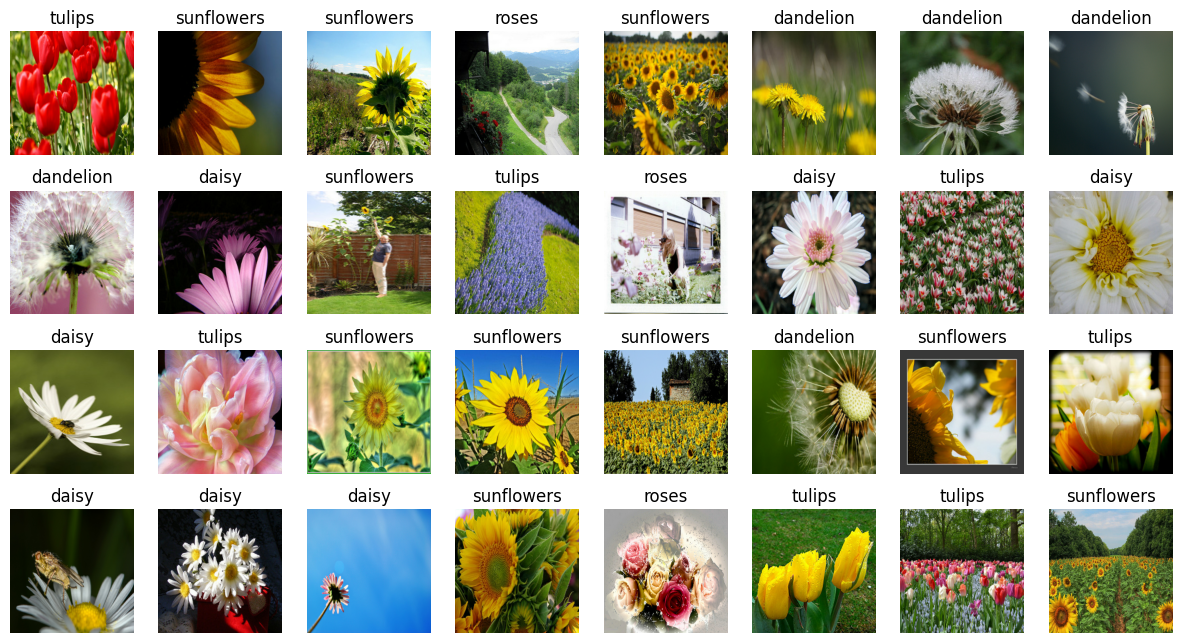

In [3]:
train = raw_train.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))
validation = raw_validation.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))
test = raw_test.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))

utils.example_display(dataset_info, train, num_examples=32, is_raw = False)

## 1.2 모델 설정

In [4]:
basic = models_base.simple1()
basic.summary()

basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train,
                          validation_data=validation,
                          epochs=10,
                          )

utils.plot_history(basic_history)

/home/technocracy90/keras/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,429 (232.14 KB)

 Trainable params: 59,429 (232.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1737702878.237591   54608 service.cc:148] XLA service 0x7f20d4006b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737702878.238231   54608 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-24 16:14:38.273600: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737702878.360424   54608 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-24 16:14:38.846621: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_211', 4 bytes spill stores, 4 bytes spill loads



 5/46 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2305 - loss: 1.6069

I0000 00:00:1737702884.214434   54608 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3083 - loss: 1.5247

2025-01-24 16:14:47.147933: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_450', 72 bytes spill stores, 72 bytes spill loads



46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.3112 - loss: 1.5201

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(240, 240, 3), dtype=float32). Expected shape (None, 240, 240, 3), but input has incompatible shape (240, 240, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(240, 240, 3), dtype=float32)
  • training=False
  • mask=None